In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab09.ok')

Assignment: lab09
OK, version v1.13.11



# Lab 9: Residuals and Multiple Linear Regression

### Objective

In this lab, we'll review some of the properties of multiple linear regression as described in lecture 22. 

**This assignment should be completed and submitted before 11:59 PM on Monday, April 20, 2020.**


### Collaboration Policy

Data science is a collaborative activity. While you may talk to others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** in the following cell:

_List collaborators here_

In [2]:
# Run this cell
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

## Question 1

In simple linear regression, we establish relationships between one independent explanatory variable and one response variable. However, with real-world problems you will often want to use **multiple features** to model and predict a response variable. To do so, we will use multiple linear regression. Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to the observed data. Formally, the model for multiple linear regression, given $p$ features is:

$$y_i = \theta_0 + \theta_1 x_{i, 1} + \theta_2 x_{i, 2} + … + \theta_p x_{i, p} + \epsilon_i $$

Please note that we have been using the terms **features**, **independent variables**, and **explanatory variables** interchangeably. Usually “features” are used in the context of machine learning when you are trying to make predictions. “Independent variables” and “explanatory variables” are mainly found in statistics, econometrics and other related fields which focus on understanding the relationship between a set of variables.  


For example, consider the plot below which shows fuel efficiency vs. engine power for several models of automobile.

In [3]:
# Here, we load the fuel dataset, and drop any rows that have missing data
vehicle_data = sns.load_dataset('mpg').dropna()
vehicle_data = vehicle_data.sort_values('horsepower', ascending=True)
vehicle_data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan
102,26.0,4,97.0,46.0,1950,21.0,73,europe,volkswagen super beetle
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel


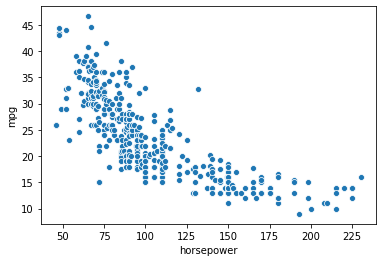

In [4]:
sns.scatterplot(x='horsepower', y='mpg', data=vehicle_data);

If we use `horsepower` alone to predict `mpg`, we get not-so-great results.

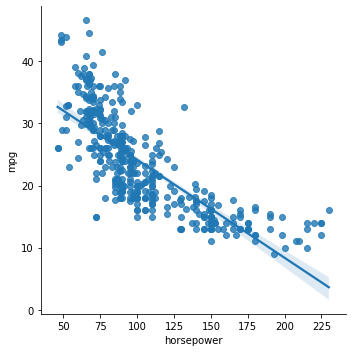

In [5]:
sns.lmplot(x='horsepower', y='mpg', data=vehicle_data);

Below, we make a residual plot of the residuals versus the fitted values for this simple linear regression model.

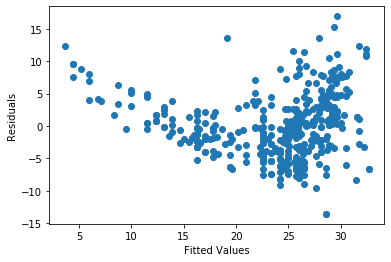

In [6]:
model_simple = LinearRegression()
model_simple.fit(vehicle_data[['horsepower']], vehicle_data['mpg'])
model_simple_fitted = model_simple.predict(vehicle_data[['horsepower']])
plt.scatter(model_simple_fitted, vehicle_data['mpg'] - model_simple_fitted)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals');

### Question 1a

What do you notice about the residual plot? Is this an example of a "good" residual plot?

<!--
BEGIN QUESTION
name: q1a
-->

Residual plot shows a pattern rather than a random distribution near 0. It's not an example of a "good" residual plot.

We can consider including functions of existing features as new features to help improve the predictive power of our model. For example, the line below adds a column which contains the square of the horsepower for each car in the dataset.

In [7]:
vehicle_data['hp^2'] = vehicle_data['horsepower'] ** 2
vehicle_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp^2
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan,2116.0
102,26.0,4,97.0,46.0,1950,21.0,73,europe,volkswagen super beetle,2116.0
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel),2304.0
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel),2304.0
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel,2304.0


### Question 1b

Using scikit learn's `LinearRegression`, create and fit a model that tries to predict `mpg` from `horsepower` AND `hp^2`. Name your model `model_multiple`.

<!--
BEGIN QUESTION
name: q1b
-->

In [8]:
model_multiple = LinearRegression()
model_multiple.fit(vehicle_data[['horsepower','hp^2']], vehicle_data['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
ok.grade("q1b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



After fitting, we can see the coefficients and intercept. Note, there are now two elements in `model_multiple.coef_`, since there are two features.

In [10]:
model_multiple.coef_

array([-0.46618963,  0.00123054])

In [11]:
model_multiple.intercept_

56.90009970211295

### Question 1c

Using the above values, in LaTeX, write out the function that the model is using to predict `mpg` from `horsepower` and `hp^2`.

<!--
BEGIN QUESTION
name: q1c
-->

$mpg = -0.46618963 hp + 0.00123054 hp^2 + 56.90009970211295$

where hp is horsepower

The plot below shows the prediction of our model. It's much better!

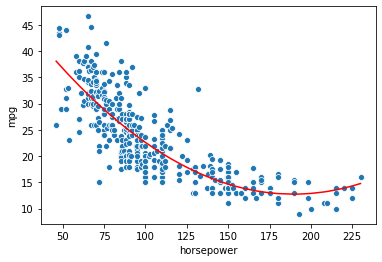

In [12]:
# DO NOT CHANGE THIS CELL
predicted_mpg = model_multiple.predict(vehicle_data[['horsepower', 'hp^2']])
sns.scatterplot(x='horsepower', y='mpg', data=vehicle_data)
plt.plot(vehicle_data['horsepower'],  predicted_mpg, color = 'r');

### Question 1d

In the cell below, explain why we use the term "linear" to describe the model above, even though it incorporates horsepower squared as a feature.

<!--
BEGIN QUESTION
name: q1d
-->

Because regression coefficients are linear.

To see exactly how much better our new model is, we can compare the multiple $R^2$ from these two fits.  As described in lecture 22,

$$R^2 =  \frac{\textrm{Var}( \hat{y})}  {\textrm{Var}({y})}$$

Recall, the numerator can be represented as $\frac{1}{n} \sum_{i=1}^{n}(\hat{y}_i - \bar{y})^2$ and the numerator can be represented as $\frac{1}{n} \sum_{i=1}^{n}(y_i -  \bar{y})^2$.


Unlike $r$ (the correlation coefficient for simple linear regression), $R^2$  can be used in the multiple regression setting.  In simple regression, $r^{2}$ and multiple $R^{2}$ are the same.

In [13]:
predicted_mpg_horsepower_only = (
    LinearRegression()
    .fit(X = vehicle_data[['horsepower']], y = vehicle_data['mpg'])
    .predict(vehicle_data[['horsepower']])
)

r2_horsepower_only = np.var(predicted_mpg_horsepower_only) / np.var(vehicle_data['mpg'])
r2_both = np.var(predicted_mpg) / np.var(vehicle_data['mpg'])

print('Multiple R^2 using only horsepower: ', r2_horsepower_only)
print('Multiple R^2 using both horsepower and horsepower squared: ', r2_both)

Multiple R^2 using only horsepower:  0.6059482578894348
Multiple R^2 using both horsepower and horsepower squared:  0.6875590305127517


By introducing `hp^2` as a feature, our multiple $R^2$ value increased. Think about what this means with respect to the strength of our refined model.

### Question 1e

In the cell below, we assign the mean of the `mpg` column of the `vehicle_data` dataframe to `mean_mpg`. Given this information, what is the mean of `predicted_mpg` and `predicted_mpg_horsepower_only` arrays?

Hint: You should not have to call `np.mean` in your code.

<!--
BEGIN QUESTION
name: q1e
-->

In [14]:
mean_mpg = np.mean(vehicle_data['mpg'])
mean_predicted_mpg = mean_mpg
mean_predicted_mpg_horsepower_only = mean_mpg

In [15]:
ok.grade("q1e");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## Question 2

Let's take this one step further, and introduce a few more features.

### Question 2a

Again, using scikit learn's `LinearRegression`, create and fit a model that tries to predict `mpg` using each of the following as features:
- `horsepower`
- `hp^2`
- `model_year`
- `acceleration`

Call your model `model_many`.

<!--
BEGIN QUESTION
name: q2a
-->

In [16]:
desired_columns = ['horsepower','hp^2','model_year','acceleration']
model_many = LinearRegression()
model_many.fit(X = vehicle_data[desired_columns], y= vehicle_data['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



The plot below shows the prediction of our more sophisticated model.

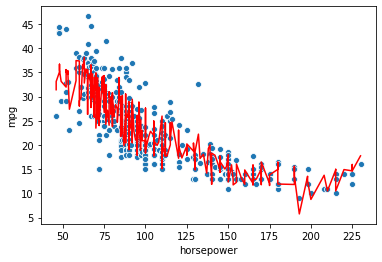

In [18]:
predicted_mpg_many = model_many.predict(vehicle_data[['horsepower', 'hp^2', 'model_year', 'acceleration']])
sns.scatterplot(x='horsepower', y='mpg', data=vehicle_data)
plt.plot(vehicle_data['horsepower'],  predicted_mpg_many, color = 'r');

### Question 2b

Think about what you see in the above plot. Why is the shape of our prediction curve so jagged? Do you think this is a good model to predict the `mpg` of some car we don't already have information on? Answer in the cell below.

<!--
BEGIN QUESTION
name: q2b
-->

It's jagged because it has 3 more features to modify the value predicted upon horsepower only. The more features selected, the closer it would be to the scatter plot, thus more jagged.
I think this is not a good model to predict the mpg of some car we don't already have information on because slight disturbance in features would cause large difference in predicted values.

### Question 2c

Lastly, set `r2_many` to be the multiple $R^2$ coefficient obtained by using `model_many`.

- Hint: This is very similar to what we did right before question 1e. Use `predicted_mpg_many`. You can also do this by looking at pairwise correlations similar to lecture 22.
- Note: The plotting cell above question 2b needs to have been run in order for this to work.

<!--
BEGIN QUESTION
name: q2c
-->

In [19]:
r2_many = np.var(predicted_mpg_many) / np.var(vehicle_data['mpg'])

In [20]:
ok.grade("q2c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [21]:
print('Multiple R^2 using only horsepower: ', r2_horsepower_only)
print('Multiple R^2 using both horsepower and horsepower squared: ', r2_both)
print('Multiple R^2 using horsepower, horsepower squared, model year, and acceleration: ', r2_many)

Multiple R^2 using only horsepower:  0.6059482578894348
Multiple R^2 using both horsepower and horsepower squared:  0.6875590305127517
Multiple R^2 using horsepower, horsepower squared, model year, and acceleration:  0.8163086433998639


### Question 2d

If everything was done correctly, the multiple $R^2$ of our latest model should be substantially higher than that of the previous two models. Why is this the case, and should we always use models that have bigger multiple $R^2$ values? Answer in the cell below.

<!--
BEGIN QUESTION
name: q2d
-->

When we use more features. $R^2$ increases as the predictor improves the model more than what is predicted by chance.

However, we should not always use models that have bigger multiple $R^2$ values. This is because multiple $R^2$ is simply an indicator of predicted variance over true variance, which is not an indicator of model fittness. Moreover, Q2b is an instance that we should not always use models that have bigger multiple $R^2$ values

**Congrats!** You are finished with this assignment.

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

In [22]:
# Save your notebook first, then run this cell to submit.
ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab09.ipynb'.
Submit... 100% complete
Submission successful for user: kema@berkeley.edu
URL: https://okpy.org/cal/data100/sp20/lab09/submissions/y99BxV

